<a href="https://colab.research.google.com/github/jigneshraiyani/DeepLearning/blob/main/Batch_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

In [6]:
df = pd.read_csv('/content/sample_data/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
x = df.iloc[: ,3:-1]
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y_df =df.iloc[:, -1].values
y_df

array([1, 0, 1, ..., 1, 1, 0])

In [9]:
x.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [10]:
x['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [11]:
x['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [12]:
x_df = pd.get_dummies(x, columns = ['Geography', 'Gender'], drop_first = True)
x_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [13]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Geography_Germany  10000 non-null  uint8  
 9   Geography_Spain    10000 non-null  uint8  
 10  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 654.4 KB


In [14]:
# Feature scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scale = scaler.fit_transform(x_df)
pd.DataFrame(x_scale)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,-0.578736,-0.573809,-1.095988
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.578736,1.742740,-1.095988
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,-0.578736,-0.573809,-1.095988
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.578736,-0.573809,-1.095988
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.578736,1.742740,-1.095988
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,-0.578736,-0.573809,0.912419
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,-0.578736,-0.573809,0.912419
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,-0.578736,-0.573809,-1.095988
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,1.727904,-0.573809,0.912419


In [15]:
#Split Data into train & test
from sklearn.model_selection import train_test_split


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_scale, y_df, test_size=.2, random_state=11 )

In [17]:
model = Sequential()
model.add(Dense(256, activation= 'relu', input_dim=11))
model.add(BatchNormalization())
model.add(Dense(256, activation= 'relu', input_dim=11))
model.add(BatchNormalization())
model.add(Dense(256, activation= 'relu', input_dim=11))
model.add(BatchNormalization())
model.add(Dense(1, activation= 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization_2 (Batc  (None, 256)              1

In [18]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
250/250 [==============================] - 8s 6ms/step - loss: 0.4665 - accuracy: 0.7951 - val_loss: 0.3660 - val_accuracy: 0.8495
Epoch 2/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3721 - accuracy: 0.8474 - val_loss: 0.3615 - val_accuracy: 0.8525
Epoch 3/100
250/250 [==============================] - 2s 7ms/step - loss: 0.3541 - accuracy: 0.8531 - val_loss: 0.3744 - val_accuracy: 0.8530
Epoch 4/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3442 - accuracy: 0.8551 - val_loss: 0.3631 - val_accuracy: 0.8445
Epoch 5/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3413 - accuracy: 0.8602 - val_loss: 0.3662 - val_accuracy: 0.8540
Epoch 6/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3327 - accuracy: 0.8608 - val_loss: 0.3590 - val_accuracy: 0.8590
Epoch 7/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3246 - accuracy: 0.8665 - val_loss: 0.3554 - val_accuracy: 0.8545

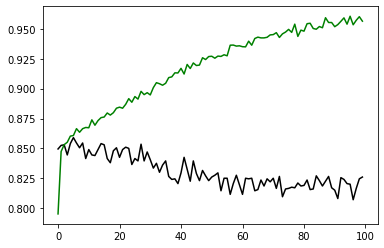

In [20]:
plt.plot(history.history['val_accuracy'], color='black')
plt.plot(history.history['accuracy'], color='green')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               3072      
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 134,913
Trainable params: 134,913
Non-trainable params: 0
_________________________________________________________________


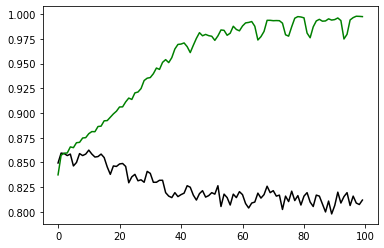

In [21]:
from sys import version
# Without batch normalization

model1 = Sequential()
model1.add(Dense(256, activation= 'relu', input_dim=11))
model1.add(Dense(256, activation= 'relu', input_dim=11))
model1.add(Dense(256, activation= 'relu', input_dim=11))
model1.add(Dense(1, activation= 'sigmoid'))
model1.summary()
model1.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
history1 = model1.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), verbose=0)
plt.plot(history1.history['val_accuracy'], color='black')
plt.plot(history1.history['accuracy'], color='green')

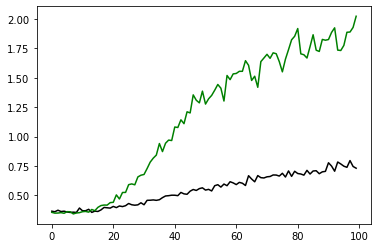

In [22]:
plt.plot(history.history['val_loss'], color='black') # with batch normalization
plt.plot(history1.history['val_loss'], color='green') # without batch normalisation

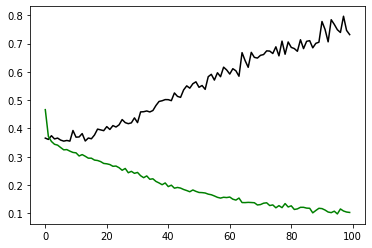

In [23]:
plt.plot(history.history['val_loss'], color='black') # with batch normalization
plt.plot(history.history['loss'], color='green') # with batch normalization

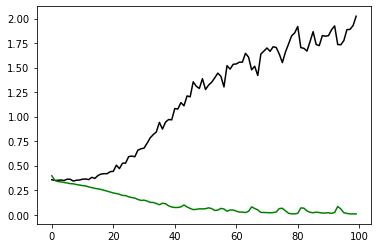

In [24]:
plt.plot(history1.history['val_loss'], color='black') # without batch normalization
plt.plot(history1.history['loss'], color='green') # without batch normalization

In [25]:
from tensorflow.keras.callbacks import EarlyStopping


In [26]:
callback = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=20, verbose=1,
                         mode='auto', baseline=None, restore_best_weights=False, start_from_epoch=0)

In [27]:
model2 = Sequential()
model2 = Sequential()
model2.add(Dense(256, activation= 'relu', input_dim=11, kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))

model2.add(Dense(256, activation= 'relu', input_dim=11, kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))

model2.add(Dense(256, activation= 'relu', input_dim=11, kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))

model2.add(Dense(1, activation= 'sigmoid'))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               3072      
                                                                 
 batch_normalization_3 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization_4 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 256)              

In [33]:
model2.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])
history2 = model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=200, callbacks=callback)

Epoch 1/200
250/250 [==============================] - 5s 7ms/step - loss: 6.6920 - accuracy: 0.7502 - val_loss: 2.3649 - val_accuracy: 0.8015
Epoch 2/200
250/250 [==============================] - 1s 6ms/step - loss: 1.4103 - accuracy: 0.8159 - val_loss: 0.8596 - val_accuracy: 0.8330
Epoch 3/200
250/250 [==============================] - 1s 5ms/step - loss: 0.6993 - accuracy: 0.8351 - val_loss: 0.5694 - val_accuracy: 0.8365
Epoch 4/200
250/250 [==============================] - 1s 5ms/step - loss: 0.5475 - accuracy: 0.8355 - val_loss: 0.4944 - val_accuracy: 0.8445
Epoch 5/200
250/250 [==============================] - 1s 6ms/step - loss: 0.5037 - accuracy: 0.8372 - val_loss: 0.4727 - val_accuracy: 0.8535
Epoch 6/200
250/250 [==============================] - 1s 5ms/step - loss: 0.5089 - accuracy: 0.8370 - val_loss: 0.4741 - val_accuracy: 0.8575
Epoch 7/200
250/250 [==============================] - 2s 7ms/step - loss: 0.4871 - accuracy: 0.8397 - val_loss: 0.4626 - val_accuracy: 0.8560

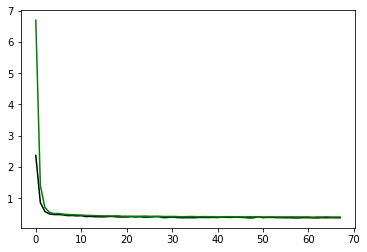

In [34]:
plt.plot(history2.history['val_loss'], color='black') # with batch normalization & dropout
plt.plot(history2.history['loss'], color='green') # with batch normalization & dropout

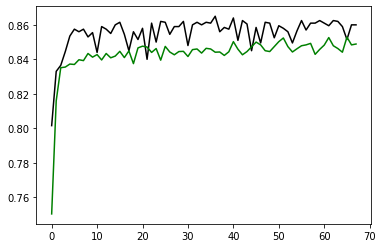

In [35]:
plt.plot(history2.history['val_accuracy'], color='black') # with batch normalization & dropout
plt.plot(history2.history['accuracy'], color='green') # with batch normalization & dropout